In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predicted = clf.predict(iris.data)

In [20]:
import numpy 
na = numpy.array([True,False,True])
sum(na)

2

In [21]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.96

In [23]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
m= confusion_matrix(iris.target, predicted)
m

[0 1 2]


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


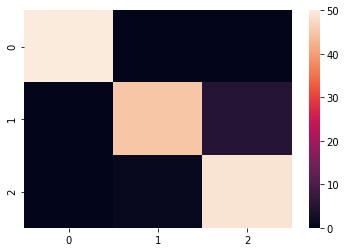

In [24]:
%pylab inline

import seaborn
seaborn.heatmap(m)

In [26]:
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target

In [62]:
import random
random.seed(123)
random.randint(1,100)
print(random.sample(range(42),k=6))
print(random.sample(range(42),k=6))
print(random.sample(range(42),k=6))

[17, 5, 26, 41, 6, 2]
[24, 34, 35, 21, 38, 3]
[10, 8, 21, 35, 39, 15]


In [63]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size =0.33, random_state = 123)

In [65]:
train_X.shape

(100, 4)

In [66]:
test_X.shape

(50, 4)

In [68]:
train_y.shape

(100,)

In [69]:
test_y.shape

(50,)

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
predicted = clf.predict(test_X)

In [73]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(test_X)
accuracy_score(test_y, predicted)

0.96

In [74]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test_y, predicted)
m

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]], dtype=int64)

In [79]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

acc = []
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train], X[test], y[train], y[test]
    
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    
    predicted = clf.predict(test_X)
    
    acc.append(accuracy_score(test_y, predicted))


In [81]:
sum(acc) / len(acc)

0.96

In [83]:
np_acc = np.array(acc)
np_acc.mean()

0.96

In [85]:
np_acc.var()

0.0028444444444444433

In [86]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X=iris.data, y=iris.target, cv= 10)


In [88]:
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [89]:
acc.mean()

0.96

In [90]:
acc.std()

0.044221663871405324

In [92]:
from sklearn.model_selection import LeaveOneOut
res = []
loo = LeaveOneOut()
for train, test in loo.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train],y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res) /  len(res)

0.96